In [10]:
import torchinfo
import numpy as np
import torch
from murenn import DTCWTDirect
from models.basic import get_model
from matplotlib import pyplot as plt

# Calculate parameters & macc

In [11]:
MAX_PARAMS = 32000
MAX_MACC = 30e6

def get_torch_size(model, input_size):
    model_profile = torchinfo.summary(model, input_size=input_size)
    return model_profile.total_mult_adds, model_profile.total_params

def validate(macc, params):
    print('Model statistics:')
    print('MACC:\t \t %.3f' %  (macc/1e6), 'M')
    print('Memory:\t \t %.3f' %  (params/1e3), 'K\n')
    if macc>MAX_MACC:
        print('[Warning] Multiply accumulate count', macc, 'is more than the allowed maximum of', int(MAX_MACC))
    if params>MAX_PARAMS:
        print('[Warning] parameter count', params, 'is more than the allowed maximum of', int(MAX_PARAMS))

In [12]:
mmcs, para = get_torch_size(DTCWTDirect(), input_size=(1,1,44100))
print(f'dtcwt:mmacs:{mmcs}; para:{para}')

dtcwt:mmacs:0; para:0


In [14]:
for alpha in [5, 10, 15, 18, 22, 33, 66]:
    beta = int(330//alpha)
    mmcs, para = get_torch_size(get_model(alpha=alpha,beta=beta,m=1,n=1), input_size=(1,1,44100))
    print(mmcs)
    print(para)

29566030
9910
29566030
9910
29566030
9910
29028466
9730
29566030
9910
29566030
9910
29566030
9910


# histogram

In [15]:
from torch.utils.data import DataLoader
from dataset.dcase24 import get_training_set, get_test_set, get_eval_set

In [45]:
# a random sample (without preprocessing)
dataset = get_training_set(
    split=100,
    roll=0,
    dir_prob=0,
)
train_idx = torch.randint(len(dataset), size=(1,)).item()
sample = dataset[train_idx]
print(f"file name:\n{sample[1]}")

file name:
audio/park-london-95-2642-9-a.wav


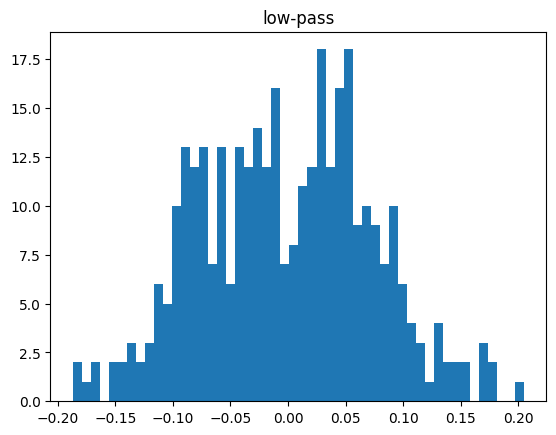

In [24]:
n_bins=50
dtcwt = DTCWTDirect()
lp, bps = dtcwt(x)
lp = lp.numpy().flatten()
plt.hist(lp, bins=n_bins)
plt.title("low-pass")
plt.show()

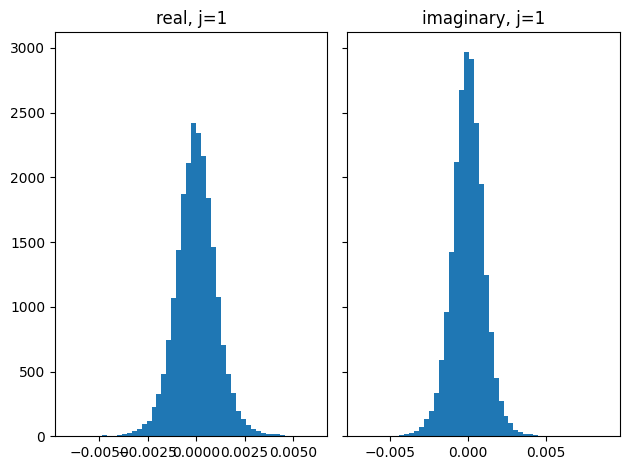

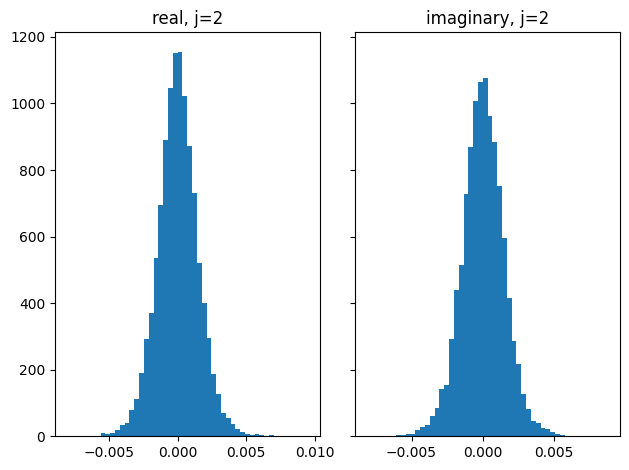

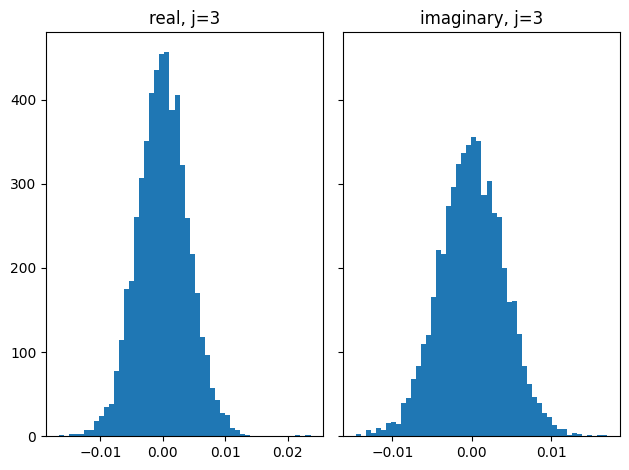

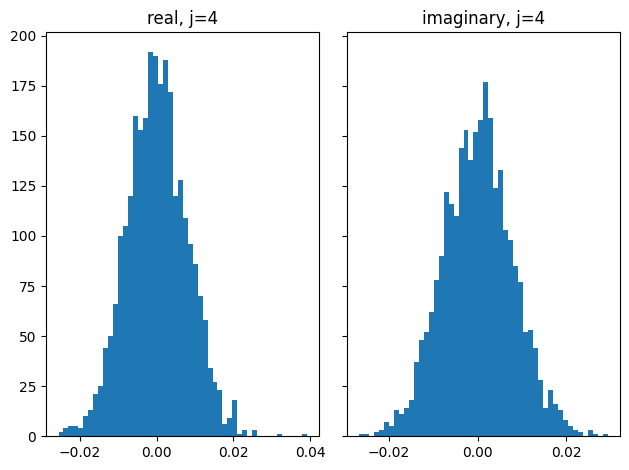

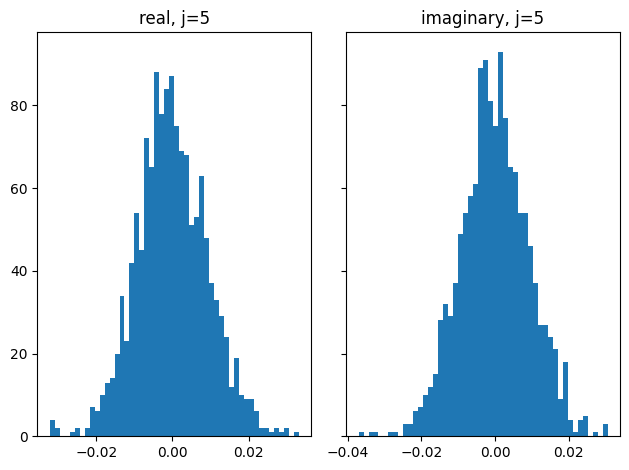

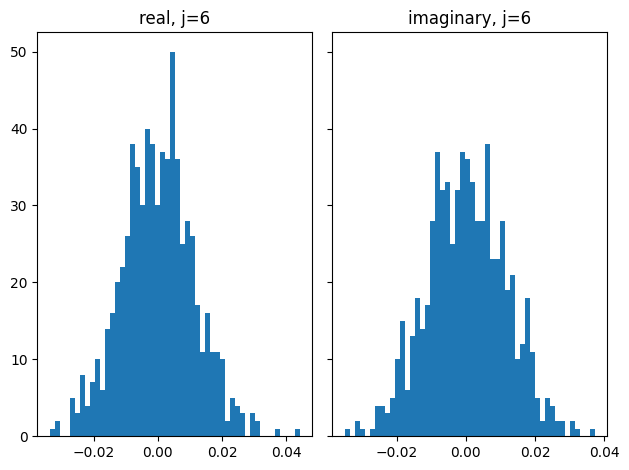

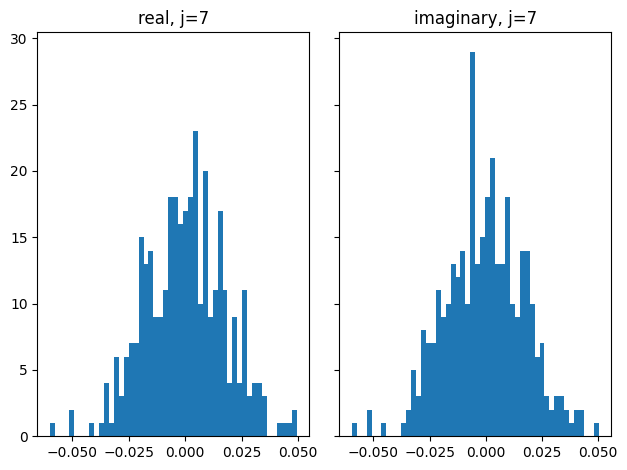

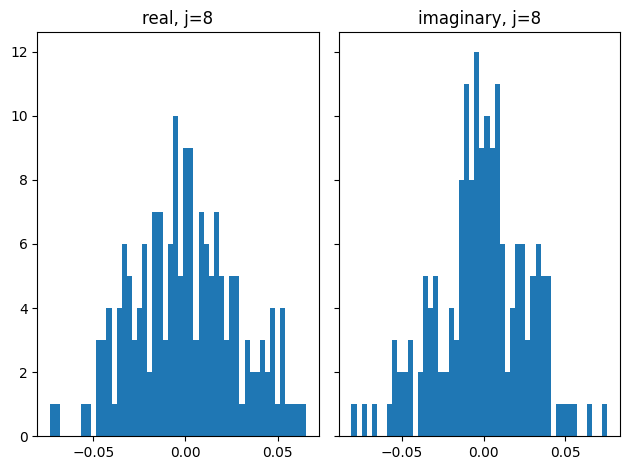

In [25]:
for j in range(len(bps)):
    bp = bps[j].numpy().flatten()
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(bp.real, bins=n_bins)
    axs[1].hist(bp.imag, bins=n_bins)
    axs[0].title.set_text(f"real, j={j+1}")
    axs[1].title.set_text(f"imaginary, j={j+1}")
    plt.show()